# Exploring Radar data

In [1]:
from Wamos2.polar_image import PolarImage
polarImage = PolarImage(r"Data\Polar Images\0508_1100\20160508110000ocm.pol")

ModuleNotFoundError: No module named 'scipy'

## Rendering and Saving to PNG

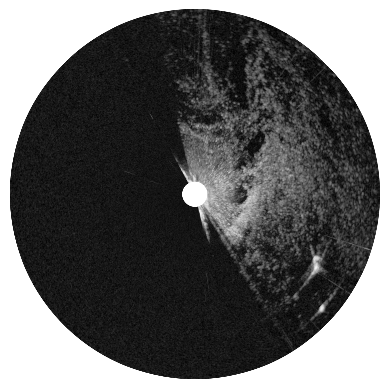

<Figure size 400x400 with 0 Axes>

In [2]:
polarImage.render()

You can use save_with_metadata() to save to png with header info, or saveto() to save without header info

In [3]:
polarImage.save_with_metadata(output_path="Output/output.png")

<Figure size 400x400 with 0 Axes>

## Extracting Header info from saved PNG.

In [4]:
from PIL import Image
import json

def display_png_text_chunks(png_path):
    with Image.open(png_path) as img:

        # Display the image
        img.show(title="Image Data") # comment this out if you are not running on local machine

        # Accessing the text chunks
        header_info = json.loads(img.text["json_data"])
        print(header_info)


display_png_text_chunks(r"Output\output.png")

{'OWNER': {'value': 'OceanWaveS GmbH', 'description': 'OWNER OF PROGRAM'}, 'VINFO': {'value': 'WinWaMoS - Version 8.0.0.13 (4559)', 'description': 'N/A'}, 'VERSN': {'value': 'Aug 14 2014 16:06:32', 'description': 'COMPILATION DATE AND TIME'}, 'TOWER': {'value': 'ONC Cape Mudge', 'description': 'N/A'}, 'IDENT': {'value': 'ocm', 'description': 'SHORT IDENTIFIER'}, 'USER': {'value': '100S6 25 kW', 'description': 'N/A'}, 'LAT': {'value': '049°59.900 N', 'description': '[Degree] POSITION NORTH'}, 'LONG': {'value': '125°11.767 W', 'description': '[Degree] POSITION EAST'}, 'POSTV': {'value': 0, 'description': 'LAT LONG VALID FLAG'}, 'DATE': {'value': '05-08-2016', 'description': '[MM-DD-YYYY]'}, 'TIME': {'value': '11:00:00', 'description': '[HH:MM:SS]'}, 'ZONE': {'value': 1, 'description': 'Time zone, 0=UTC'}, 'TMINT': {'value': 1, 'description': '[min] MINUTES BETWEEN RECORDING CYCLES'}, 'NMEAN': {'value': 1, 'description': '[min] MINIMUM LENGTH OF A RECORDING CYCLE'}, 'ANALM': {'value': 1, 

# Batch Extracting Polar Images

In [ ]:
import glob
import os
import pathlib
from Wamos2.polar_image import PolarImage


def find_pol_files(directory, ext = "pol"):
    pattern = os.path.join(directory, f"**/*.{ext}")
    pol_files = glob.glob(pattern, recursive=True)
    return pol_files


directory_path = "Data\Polar Images"
output_path = "Output"

pol_files = find_pol_files(directory_path)
files_already_extracted = find_pol_files(output_path, ext="png")

print(f"Found {len(pol_files)} pol files:")
print(f"{len(files_already_extracted)} files already extracted")


for file in pol_files[len(files_already_extracted):]:
    file_path_relative = pathlib.Path(file)
    file_name = file_path_relative.stem

    polarImage = PolarImage(file_path_relative)
    polarImage.save_with_metadata()

# Buoy Data Exploration

In [5]:
import pandas as pd

# Load the CSV file to inspect its structure and first few rows
csv_path = r"Data\Buoy Data\filtered_data_C46131.csv"
data = pd.read_csv(csv_path)

# Convert the DATE column to datetime
data["DATE"] = pd.to_datetime(data["DATE"])
data.rename(columns={"DATE": "datetime"}, inplace=True)
# Set DATE as the index
data.set_index("datetime", inplace=True)

# Display the first few rows of the dataframe
data

,STN_ID,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,VCAR,VTPK,VWH$,VCMX,VTP$,...,GSPD,WDIR.1,WSPD.1,WSS$.1,GSPD.1,ATMS,ATMS.1,DRYT,SSTP,Unnamed: 23
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:32:00,C46131,1,49.91,124.99,14.0,0.05,12.80,0.0,0.1,6.2,...,3.3,0.0,0.0,NaN,0.0,1033.8,1033.8,3.7,7.0,NaN
2015-01-01 01:32:00,C46131,1,49.91,124.99,14.0,0.05,12.19,0.0,0.1,6.0,...,2.3,0.0,0.0,NaN,0.0,1033.6,1033.6,3.8,6.8,NaN
2015-01-01 02:32:00,C46131,1,49.91,124.99,14.0,0.05,11.64,0.0,0.1,3.2,...,2.7,0.0,0.0,NaN,0.0,1033.3,1033.3,3.7,6.6,NaN
2015-01-01 03:32:00,C46131,1,49.91,124.99,14.0,0.05,12.19,0.0,0.1,5.4,...,1.5,0.0,0.0,NaN,0.0,1033.0,1033.0,3.6,6.5,NaN
2015-01-01 04:32:00,C46131,4,49.91,124.99,14.0,0.05,12.19,0.0,0.1,5.8,...,3.4,0.0,0.0,NaN,0.0,1032.5,1032.5,3.0,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 19:32:00,C46131,4,49.91,124.99,14.0,0.35,28.44,0.3,0.8,2.7,...,4.9,331.0,4.1,NaN,5.3,1025.0,1024.9,2.1,6.4,NaN
2017-12-30 20:32:00,C46131,4,49.91,124.99,14.0,0.21,28.44,0.2,0.4,2.4,...,2.6,338.0,1.5,NaN,2.8,1025.5,1025.4,2.8,6.4,NaN
2017-12-30 21:32:00,C46131,4,49.91,124.99,14.0,0.16,28.44,0.1,0.4,2.2,...,4.0,347.0,3.0,NaN,4.3,1025.7,1025.7,2.7,6.4,NaN


In [6]:
data.describe()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,VCAR,VTPK,VWH$,VCMX,VTP$,WDIR,...,GSPD,WDIR.1,WSPD.1,WSS$.1,GSPD.1,ATMS,ATMS.1,DRYT,SSTP,Unnamed: 23
count,25513.000000,2.551300e+04,2.551300e+04,25513.0,25513.000000,25513.000000,25513.000000,25513.000000,25513.000000,25513.000000,...,25513.000000,25513.000000,25513.000000,0.0,25513.000000,25513.000000,25513.000000,25513.000000,25513.000000,0.0
mean,2.876690,4.991000e+01,1.249900e+02,14.0,0.428065,21.612151,0.379928,1.020876,3.366699,213.738525,...,5.713993,210.880963,4.713056,NaN,5.824732,1016.016964,1016.008345,11.132466,11.921334,NaN
std,1.454468,1.421113e-14,1.421113e-14,0.0,0.462576,10.588291,0.428849,1.048207,1.301834,100.414732,...,3.772277,105.102007,3.232285,NaN,3.951717,8.165122,8.165661,4.936300,3.829556,NaN
min,0.000000,4.991000e+01,1.249900e+02,14.0,0.030000,2.220000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,977.600000,977.600000,-2.000000,4.600000,NaN
25%,1.000000,4.991000e+01,1.249900e+02,14.0,0.100000,7.420000,0.100000,0.300000,2.300000,126.000000,...,2.800000,128.000000,2.200000,NaN,2.800000,1011.800000,1011.800000,7.500000,8.500000,NaN
50%,4.000000,4.991000e+01,1.249900e+02,14.0,0.260000,28.440000,0.200000,0.800000,2.900000,216.000000,...,4.900000,200.000000,4.100000,NaN,5.000000,1016.600000,1016.600000,10.900000,11.100000,NaN
75%,4.000000,4.991000e+01,1.249900e+02,14.0,0.570000,28.440000,0.500000,1.400000,4.100000,313.000000,...,7.900000,315.000000,6.700000,NaN,8.100000,1020.900000,1020.900000,15.100000,15.200000,NaN
max,4.000000,4.991000e+01,1.249900e+02,14.0,3.570000,28.440000,3.000000,16.300000,7.500000,360.000000,...,23.800000,360.000000,38.200000,NaN,75.000000,1040.700000,1040.700000,26.600000,23.900000,NaN


## Keep only "Good" Quality Data

In [7]:
data = data[data["Q_FLAG"] <= 1]
data

,STN_ID,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,VCAR,VTPK,VWH$,VCMX,VTP$,...,GSPD,WDIR.1,WSPD.1,WSS$.1,GSPD.1,ATMS,ATMS.1,DRYT,SSTP,Unnamed: 23
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:32:00,C46131,1,49.91,124.99,14.0,0.05,12.80,0.0,0.1,6.2,...,3.3,0.0,0.0,NaN,0.0,1033.8,1033.8,3.7,7.0,NaN
2015-01-01 01:32:00,C46131,1,49.91,124.99,14.0,0.05,12.19,0.0,0.1,6.0,...,2.3,0.0,0.0,NaN,0.0,1033.6,1033.6,3.8,6.8,NaN
2015-01-01 02:32:00,C46131,1,49.91,124.99,14.0,0.05,11.64,0.0,0.1,3.2,...,2.7,0.0,0.0,NaN,0.0,1033.3,1033.3,3.7,6.6,NaN
2015-01-01 03:32:00,C46131,1,49.91,124.99,14.0,0.05,12.19,0.0,0.1,5.4,...,1.5,0.0,0.0,NaN,0.0,1033.0,1033.0,3.6,6.5,NaN
2015-01-01 05:32:00,C46131,1,49.91,124.99,14.0,0.06,12.19,0.0,0.1,2.7,...,1.0,0.0,0.0,NaN,0.0,1032.0,1032.0,3.2,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-28 20:32:00,C46131,1,49.91,124.99,14.0,1.11,5.33,1.1,1.7,5.1,...,3.8,90.0,2.6,NaN,4.3,1012.9,1012.9,4.9,7.2,NaN
2017-12-28 21:32:00,C46131,1,49.91,124.99,14.0,0.77,5.89,0.7,1.3,5.7,...,4.0,39.0,3.3,NaN,4.3,1012.7,1012.7,4.0,7.6,NaN
2017-12-29 00:32:00,C46131,1,49.91,124.99,14.0,0.47,5.33,0.4,0.8,5.3,...,5.4,352.0,5.1,NaN,5.9,1013.8,1013.7,3.0,7.4,NaN


## Temporal Analysis

C:\Users\xtrm2\AppData\Local\Temp\ipykernel_14612\2951210538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors="coerce")
C:\Users\xtrm2\AppData\Local\Temp\ipykernel_14612\2951210538.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data[numeric_columns].resample("M").mean()


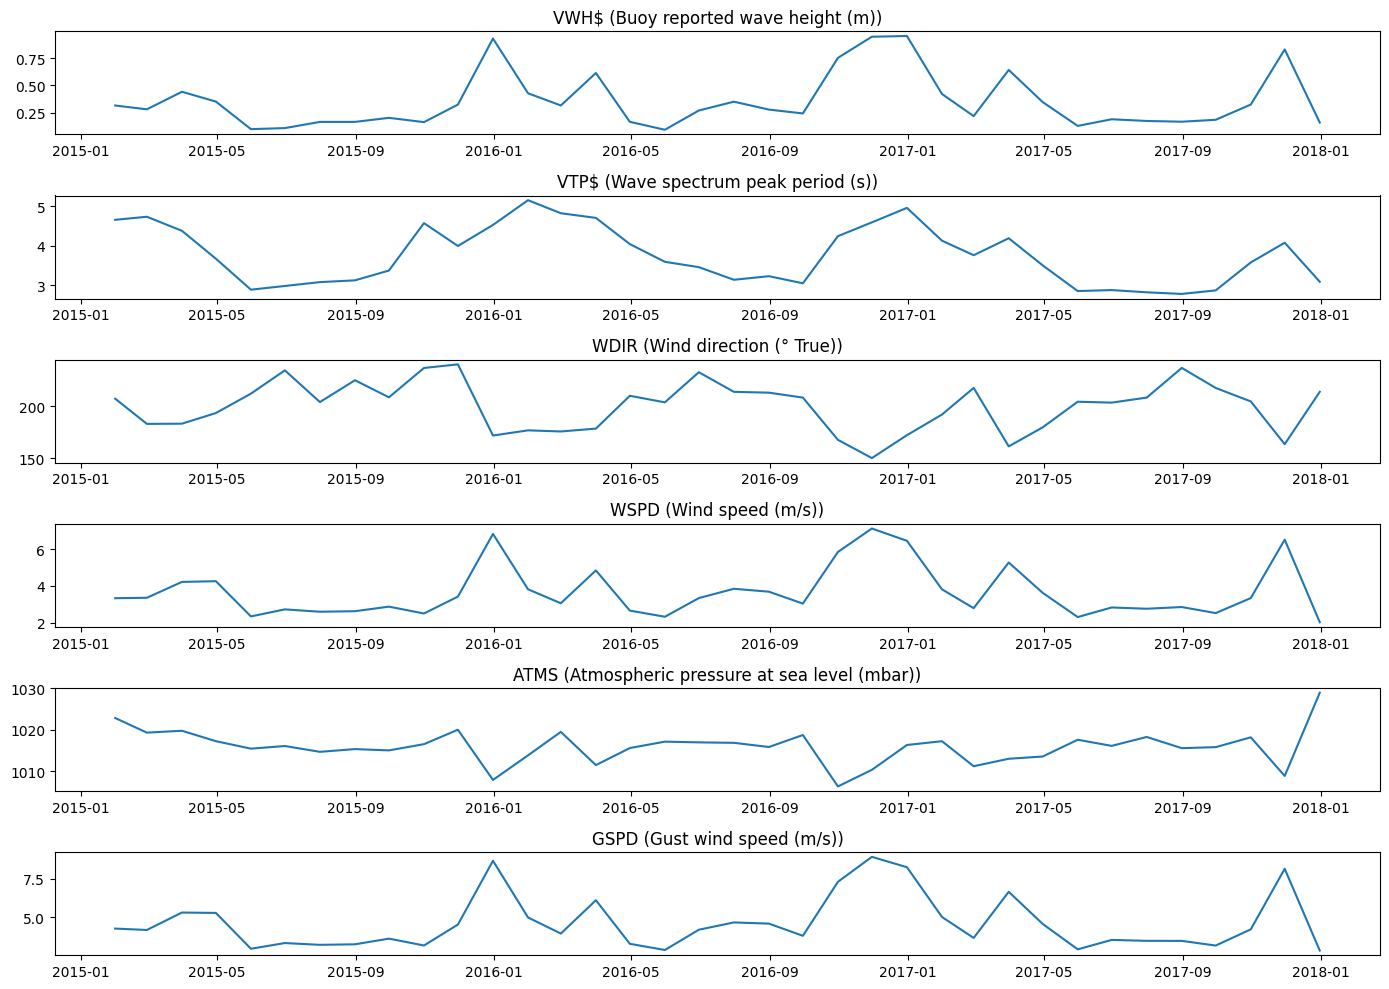

In [9]:
import matplotlib.pyplot as plt


# Ensure columns are in numeric format
numeric_columns = ["VWH$", "VTP$", "WDIR", "WSPD", "ATMS", "GSPD"]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Resample the data on a monthly basis for numeric columns only and calculate the mean
monthly_data = data[numeric_columns].resample("M").mean()


param_descriptions = {
    "VWH$": "Buoy reported wave height (m)",
    "VTP$": "Wave spectrum peak period (s)",
    "WDIR": "Wind direction (° True)",
    "WSPD": "Wind speed (m/s)",
    "ATMS": "Atmospheric pressure at sea level (mbar)",
    "GSPD": "Gust wind speed (m/s)",
}

# Re-plotting with the updated data
plt.figure(figsize=(14, 10))
for i, param in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.plot(monthly_data.index, monthly_data[param])
    plt.title(f"{param} ({param_descriptions[param]})")
    plt.tight_layout()

plt.show()

## Correlation Analysis

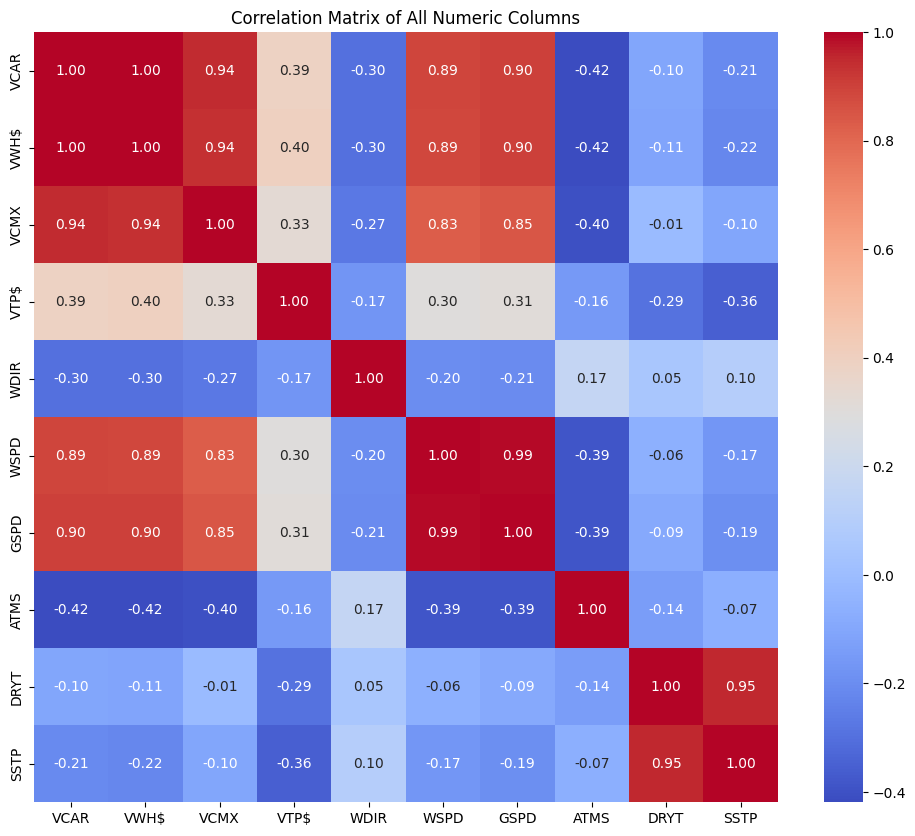

In [10]:
import seaborn as sns
import numpy as np

# Calculate the Pearson correlation coefficients for all numeric columns
correlation_matrix = (
    data.select_dtypes(include=[np.number])
    .drop(
        columns=[
            "Q_FLAG",
            "LATITUDE",
            "LONGITUDE",
            "DEPTH",
            "Unnamed: 23",
            "VTPK",
            "WSS$",
            "WDIR.1",
            "WSPD.1",
            "WSS$.1",
            "GSPD.1",
            "ATMS.1"
        ]
    )
    .corr()
)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of All Numeric Columns")
plt.show()

# Merging Datasets

## Image Dataset

In [14]:
import os
import pandas as pd

def get_file_lists(directory):
    file_names = []
    file_paths = []

    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            file_names.append(filename)
            file_paths.append(os.path.join(dirpath, filename))

    return file_names, file_paths


directory = "Output"
file_names, file_paths = get_file_lists(directory)

file_names = file_names[4:] # Make sure there arent Sample images like InspTest, output, Unclean, log, etc
file_paths = file_paths[4:] # Check the print statement and change index such that the first picture in 20160428....png

print("File names:", file_names)
print("File paths:", file_paths)

image_dt_index = pd.DatetimeIndex(pd.to_datetime([elem[:14] for elem in file_names]))
image_dt = pd.DataFrame(index=image_dt_index)
image_dt["file_path"] = file_paths

image_dt.reset_index(inplace=True)
image_dt.rename(columns={'index':'datetime'}, inplace=True)


image_dt

File names: ['20160428140000ocm.png', '20160428140002ocm.png', '20160428140003ocm.png', '20160428140004ocm.png', '20160428140005ocm.png', '20160428140007ocm.png', '20160428140008ocm.png', '20160428140009ocm.png', '20160428140011ocm.png', '20160428140012ocm.png', '20160428140013ocm.png', '20160428140015ocm.png', '20160428140016ocm.png', '20160428140017ocm.png', '20160428140019ocm.png', '20160428140020ocm.png', '20160428140021ocm.png', '20160428140023ocm.png', '20160428140024ocm.png', '20160428140026ocm.png', '20160428140027ocm.png', '20160428140028ocm.png', '20160428140030ocm.png', '20160428140031ocm.png', '20160428140032ocm.png', '20160428140033ocm.png', '20160428140035ocm.png', '20160428140036ocm.png', '20160428140038ocm.png', '20160428140039ocm.png', '20160428140040ocm.png', '20160428140041ocm.png', '20160428140043ocm.png', '20160428140044ocm.png', '20160428140046ocm.png', '20160428140047ocm.png', '20160428140048ocm.png', '20160428140050ocm.png', '20160428140051ocm.png', '20160428140

,datetime,file_path
0,2016-04-28 14:00:00,Output\0428_1400\20160428140000ocm.png
1,2016-04-28 14:00:02,Output\0428_1400\20160428140002ocm.png
2,2016-04-28 14:00:03,Output\0428_1400\20160428140003ocm.png
3,2016-04-28 14:00:04,Output\0428_1400\20160428140004ocm.png
4,2016-04-28 14:00:05,Output\0428_1400\20160428140005ocm.png
...,...,...
1325,2016-05-01 18:32:00,Output\Test\20160501183200ocm.png
1326,2016-05-01 20:32:00,Output\Test\20160501203200ocm.png
1327,2016-05-01 21:32:00,Output\Test\20160501213200ocm.png
1328,2016-05-01 22:32:00,Output\Test\20160501223200ocm.png


## Filter dates according to radar data availability

In [15]:
filtered_data = data.loc["2016-04-28":"2016-05-13"]

# Display the filtered rows
filtered_data = filtered_data.drop(
    columns=[
        "STN_ID",
        "Q_FLAG",
        "LATITUDE",
        "LONGITUDE",
        "DEPTH",
        "Unnamed: 23",
        "VCAR",
        "VTPK",
        "WSS$",
        "WDIR.1",
        "WSPD.1",
        "WSS$.1",
        "GSPD.1",
        "ATMS.1",
    ]
)
filtered_data

,VWH$,VCMX,VTP$,WDIR,WSPD,GSPD,ATMS,DRYT,SSTP
datetime,,,,,,,,,
2016-04-28 05:32:00,0.1,0.1,3.3,305.0,4.8,5.7,1016.5,12.4,12.1
2016-04-28 18:32:00,0.1,0.3,4.0,129.0,2.7,3.2,1017.7,11.1,13.0
2016-04-29 00:32:00,0.4,0.8,3.5,339.0,3.7,4.4,1017.1,13.1,12.4
2016-04-30 23:32:00,0.1,0.1,2.9,280.0,0.3,0.6,1027.6,14.8,14.6
2016-05-01 09:32:00,0.1,0.2,4.1,292.0,4.4,5.0,1025.3,11.9,12.3
2016-05-02 04:32:00,0.0,0.1,2.7,22.0,2.1,2.6,1014.4,14.4,13.7
2016-05-02 07:32:00,0.1,0.5,5.4,297.0,2.5,2.9,1014.1,12.9,13.3
2016-05-03 04:32:00,0.1,0.1,2.6,60.0,3.8,5.0,1013.0,17.3,13.6
2016-05-03 06:32:00,0.1,0.1,3.1,262.0,2.7,3.7,1012.8,16.8,13.5


## Find 3 Nearest Temporal Neighbours and Average the rows and add to image_dt  

In [18]:
import pandas as pd
import numpy as np

# Add columns from filtered_data to image_dt, initialized with NaN
for col in filtered_data.columns:
    image_dt[col] = np.nan


# Define a function to find the indices of the nearest three dates in filtered_data
def find_nearest_three_indices(target_datetime, comparison_datetimes):
    time_diffs = np.abs(comparison_datetimes - target_datetime)
    nearest_indices = np.argsort(time_diffs)[:3]
    return nearest_indices


# Iterate over image_dt and update with averaged values from the nearest three rows in filtered_data
for i, row in image_dt.iterrows():
    target_datetime = row["datetime"]
    nearest_indices = find_nearest_three_indices(target_datetime, filtered_data.index)
    nearest_rows = filtered_data.iloc[nearest_indices]
    averaged_values = (
        nearest_rows.mean()
    )  # Compute the average of the nearest three rows

    # Update image_dt with averaged values
    for col in filtered_data.columns:
        image_dt.at[i, col] = averaged_values[col]


# Export merged CSV for easy import

In [173]:
image_dt.to_csv("Data/Generated/images_with_averaged_buoy_data.csv", index=False)
image_dt

,datetime,file_path,VWH$,VCMX,VTP$,WDIR,WSPD,GSPD,ATMS,DRYT,SSTP
0,2016-04-28 14:00:00,Output\0428_1400\20160428140000ocm.png,0.200000,0.400000,3.600000,257.666667,3.733333,4.433333,1017.100000,12.200000,12.5
1,2016-04-28 14:00:02,Output\0428_1400\20160428140002ocm.png,0.200000,0.400000,3.600000,257.666667,3.733333,4.433333,1017.100000,12.200000,12.5
2,2016-04-28 14:00:03,Output\0428_1400\20160428140003ocm.png,0.200000,0.400000,3.600000,257.666667,3.733333,4.433333,1017.100000,12.200000,12.5
3,2016-04-28 14:00:04,Output\0428_1400\20160428140004ocm.png,0.200000,0.400000,3.600000,257.666667,3.733333,4.433333,1017.100000,12.200000,12.5
4,2016-04-28 14:00:05,Output\0428_1400\20160428140005ocm.png,0.200000,0.400000,3.600000,257.666667,3.733333,4.433333,1017.100000,12.200000,12.5
...,...,...,...,...,...,...,...,...,...,...,...
1325,2016-05-01 18:32:00,Output\Test\20160501183200ocm.png,0.066667,0.266667,4.066667,203.666667,3.000000,3.500000,1017.933333,13.066667,13.1
1326,2016-05-01 20:32:00,Output\Test\20160501203200ocm.png,0.066667,0.266667,4.066667,203.666667,3.000000,3.500000,1017.933333,13.066667,13.1
1327,2016-05-01 21:32:00,Output\Test\20160501213200ocm.png,0.066667,0.266667,4.066667,203.666667,3.000000,3.500000,1017.933333,13.066667,13.1
1328,2016-05-01 22:32:00,Output\Test\20160501223200ocm.png,0.066667,0.266667,4.066667,203.666667,3.000000,3.500000,1017.933333,13.066667,13.1


# Model Training

## Data Preprocessing

In [174]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Input,
    concatenate,
)
from keras.preprocessing.image import img_to_array, load_img
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Load CSV data
df = pd.read_csv("Data\Generated\images_with_averaged_buoy_data.csv", index_col='datetime')

X_num = scaler.fit_transform(df[
    ["VCMX", "VTP$", "WDIR", "WSPD", "GSPD", "ATMS", "DRYT", "SSTP"]
])  

y = df["VWH$"]

test_size=0.2
# Split the image paths and numerical data into training and validation sets
X_img_paths_train, X_img_paths_val, X_num_train, X_num_val, y_train, y_val = train_test_split(df['file_path'], X_num, y, test_size=test_size, random_state=42)
print(f"Dataset split into Train and Validation with ratio of {(1-test_size)*100}% to {test_size*100}%.")

# Function to preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(256, 256))  # Resize images as needed
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize to [0, 1]
    return img

print("Preprocessing images...")
# Preprocess images for training
X_img_train = np.vstack(X_img_paths_train.apply(preprocess_image))
# Preprocess images for validation
X_img_val = np.vstack(X_img_paths_val.apply(preprocess_image))
print("Preprocessed all images.")


Dataset split into Train and Validation with ratio of 80.0% to 20.0%.
Preprocessing images...
Preprocessed all images.
Setting up CNN architecture for images.
Done
Setting up MLP architecture for numerical data.
Done
Combining both nets
Done
NN Setup complete, please proceed with the training.


## Setup CNN and MLP

In [ ]:
print("Setting up CNN architecture for images.")
# Define CNN for image input
input_img = Input(shape=(256, 256, 3))  # Adjust shape according to your image size
x = Conv2D(32, (3, 3), activation="relu")(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
print("Done")

print("Setting up MLP architecture for numerical data.")
# Define MLP for numerical input
input_num = Input(shape=(X_num_train.shape[1],))
y = Dense(64, activation="relu")(input_num)
y = Dense(32, activation="relu")(y)
print("Done")

print("Combining both nets")
# Concatenate image and numerical data paths
combined = concatenate([x, y])
print("Done")


# Add a fully connected layer and then a regression output
z = Dense(64, activation="relu")(combined)
z = Dense(1, activation="linear")(z)
print("NN Setup complete, please proceed with the training.")

## Train Model

In [176]:
# Define the model with two inputs
model = Model(inputs=[input_img, input_num], outputs=z)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss="mean_squared_error")

# Train the model
model.fit(
    [X_img_train, X_num_train],
    y_train,
    validation_data=([X_img_val, X_num_val], y_val),
    epochs=8,
    batch_size=32,
)


Epoch 1/8
34/34 [==============================] - 25s 715ms/step - loss: 0.0383 - val_loss: 8.8056e-04
Epoch 2/8
34/34 [==============================] - 23s 683ms/step - loss: 7.5112e-04 - val_loss: 4.0335e-04
Epoch 3/8
34/34 [==============================] - 23s 681ms/step - loss: 2.7103e-04 - val_loss: 1.0767e-04
Epoch 4/8
34/34 [==============================] - 24s 709ms/step - loss: 7.0062e-05 - val_loss: 3.7441e-05
Epoch 5/8
34/34 [==============================] - 23s 682ms/step - loss: 1.7322e-05 - val_loss: 2.7797e-05
Epoch 6/8
34/34 [==============================] - 23s 680ms/step - loss: 1.0299e-05 - val_loss: 2.0937e-05
Epoch 7/8
34/34 [==============================] - 23s 689ms/step - loss: 7.5002e-06 - val_loss: 1.8111e-05
Epoch 8/8
34/34 [==============================] - 23s 674ms/step - loss: 5.7662e-06 - val_loss: 1.6850e-05


## Export Model Structure as Image (requires pydot and graphviz)

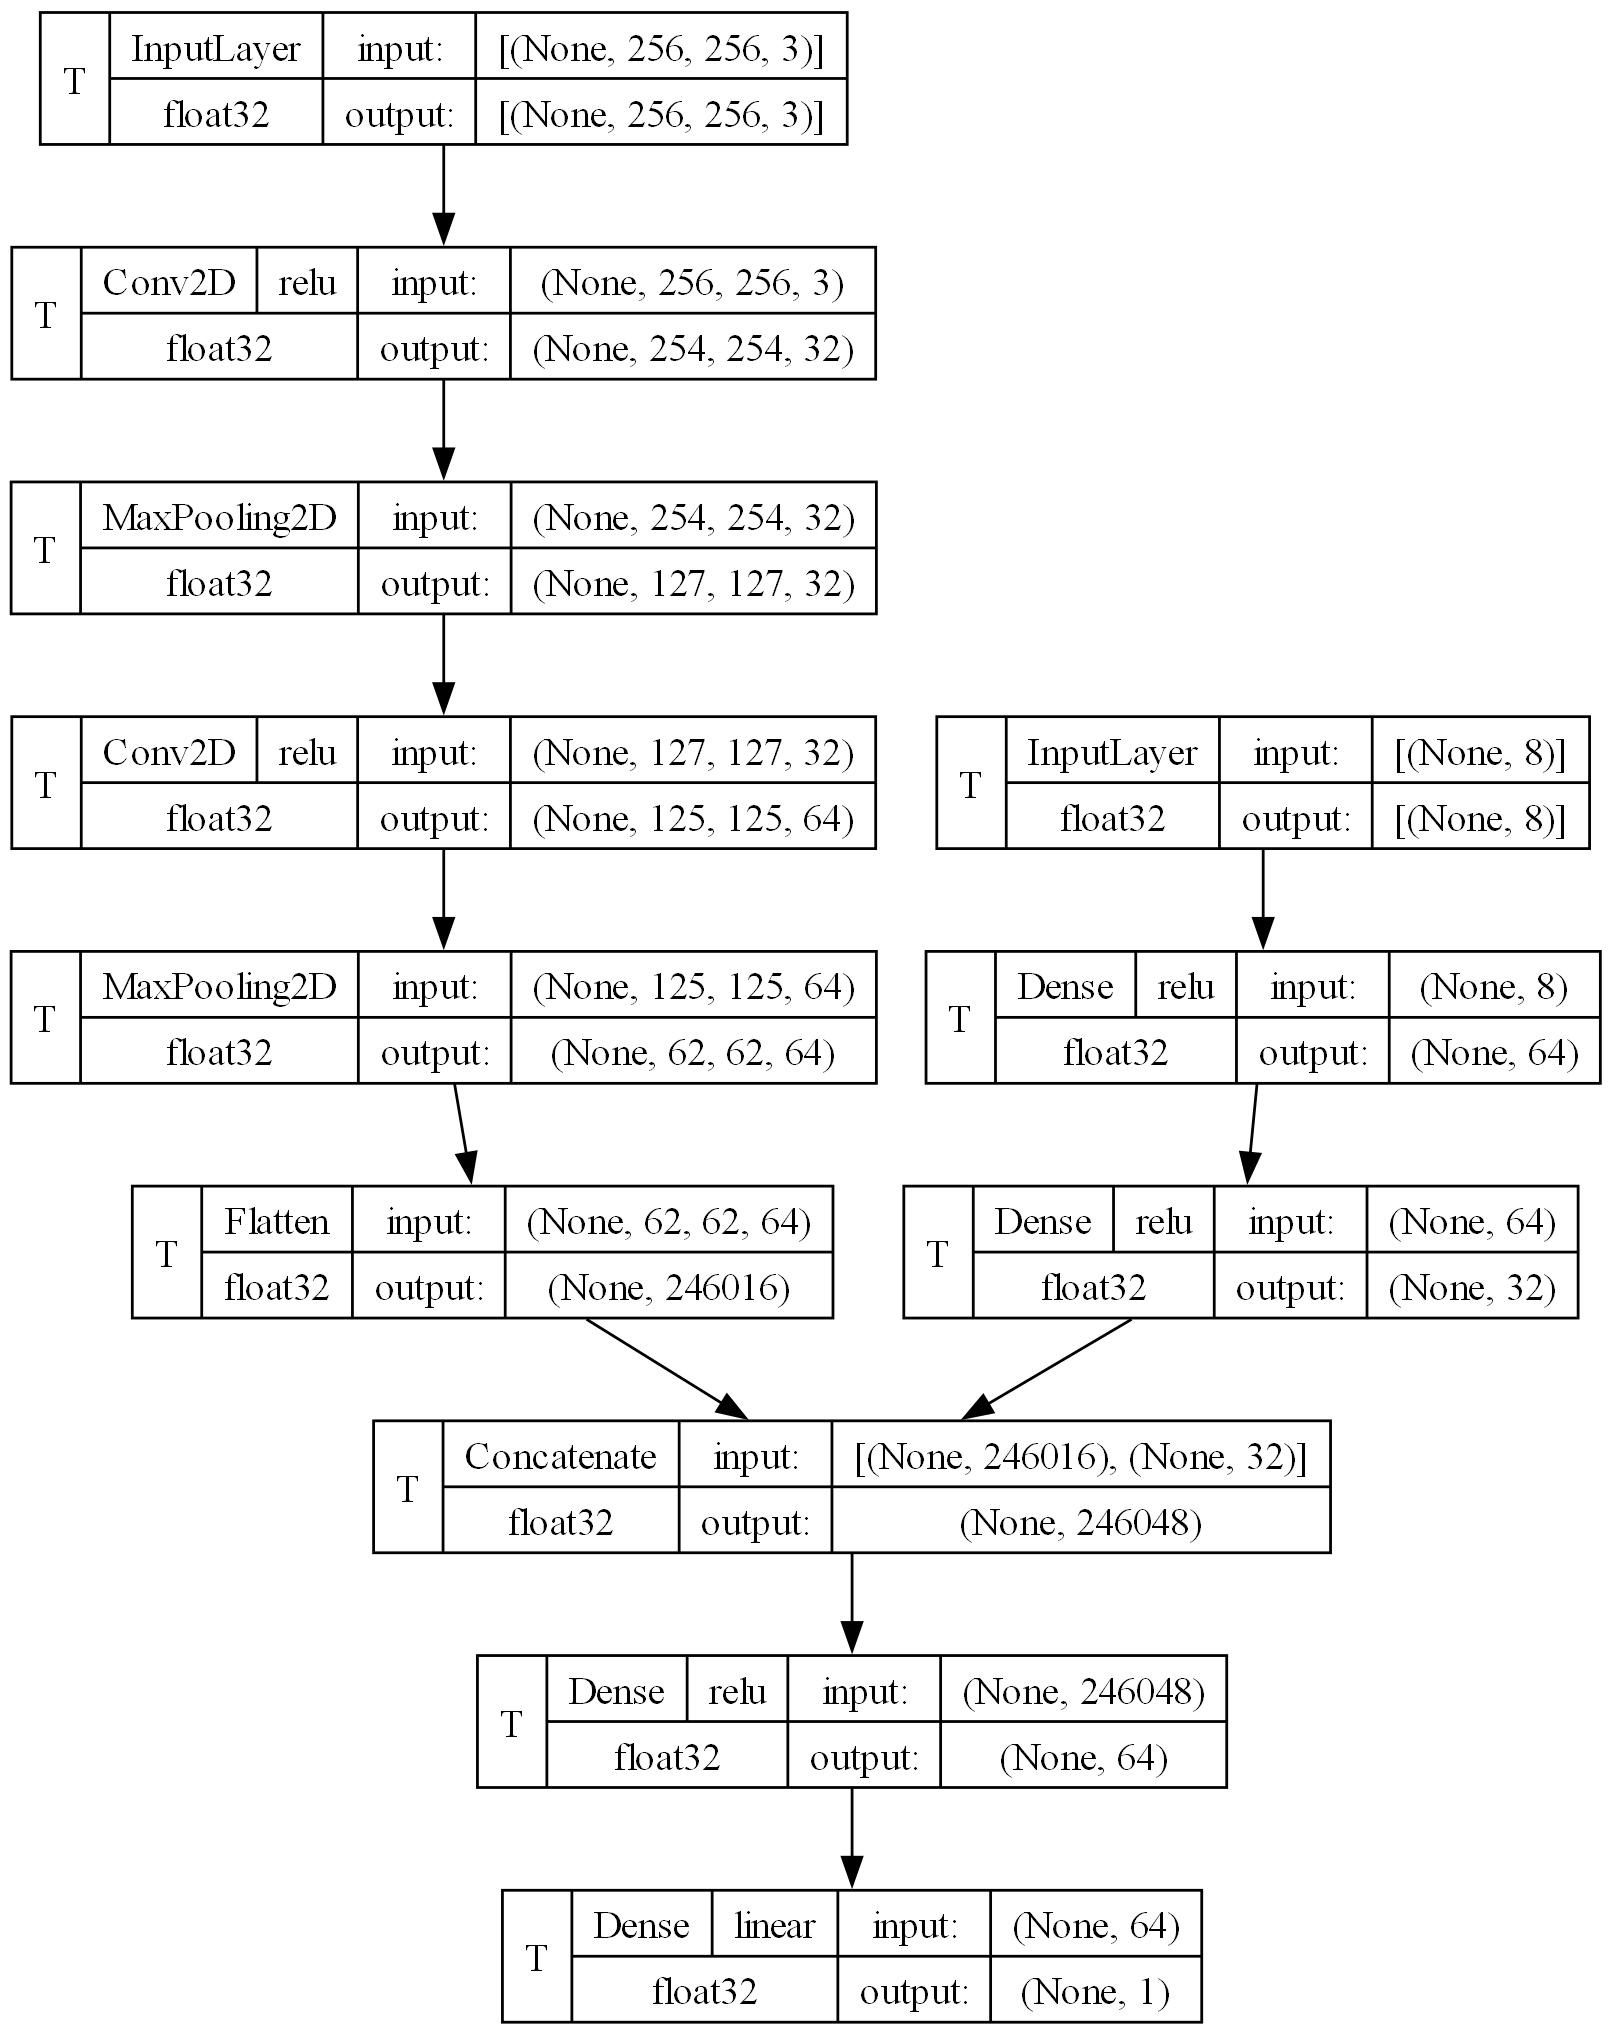

In [177]:
from keras.utils import plot_model
plot_model(
    model,
    to_file="model_visualization.png",
    show_shapes=True,
    show_layer_names=False,
    show_dtype=True,
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

# Model Testing

## Extract hourly images for a single day

In [178]:
import glob
import os
import pathlib
from src.utils.polarimage import PolarImage


def find_pol_files(directory, ext = "pol"):
    pattern = os.path.join(directory, f"**/20160501*3200ocm.{ext}")
    pol_files = glob.glob(pattern, recursive=True)
    return pol_files


directory_path = "Data\Polar Images\Test"
output_path = "Output\Test"

pol_files = find_pol_files(directory_path)
files_already_extracted = find_pol_files(output_path, ext="png")

print(f"Found {len(pol_files)} pol files:")
print(f"{len(files_already_extracted)} files already extracted")


for file in pol_files[len(files_already_extracted):]:
    file_path_relative = pathlib.Path(file)
    file_name = file_path_relative.stem

    polarImage = PolarImage(file_path_relative)
    polarImage.save_with_metadata()

Found 22 pol files:
22 files already extracted


## Create a dataframe of the 22 images

In [179]:
import os

# Replace 'your_directory_path' with the path of your directory
directory_path = 'Output\Test'

file_names = []
file_paths = []

# Walk through the directory
for dirpath, dirnames, filenames in os.walk(directory_path):
    for filename in filenames:
        # Append file name to file_names list
        file_names.append(filename)
        # Append full path to file_paths list
        full_path = os.path.join(dirpath, filename)
        file_paths.append(full_path)

image_dt_index = pd.DatetimeIndex(pd.to_datetime([elem[:14] for elem in file_names]))
image_dt = pd.DataFrame(index=image_dt_index)
image_dt["file_path"] = file_paths

image_dt.reset_index(inplace=True)
image_dt.rename(columns={'index':'datetime'}, inplace=True)

## Ready numerical data from buoy data

In [187]:
# Load the CSV file to inspect its structure and first few rows
csv_path = r"Data\Buoy Data\filtered_data_C46131.csv"
data = pd.read_csv(csv_path)

# Convert the DATE column to datetime
data["DATE"] = pd.to_datetime(data["DATE"])
data.rename(columns={"DATE": "datetime"}, inplace=True)
# Set DATE as the index
data.set_index("datetime", inplace=True)
filtered_data = data.loc["2016-05-01":"2016-05-01"]
# filtered_data = filtered_data[filtered_data['Q_FLAG']<=1]
# Display the filtered rows
filtered_data = filtered_data.drop(
    columns=[
        "STN_ID",
        "Q_FLAG",
        "LATITUDE",
        "LONGITUDE",
        "DEPTH",
        "Unnamed: 23",
        "VTPK",
        "WSS$",
        "WDIR.1",
        "WSPD.1",
        "WSS$.1",
        "GSPD.1",
        "ATMS.1",
    ]
)

## Get the nearset wave height for given images

If image was captured at 11:00:00 and buoy data was captured at 11:32:00, automatically take the nearset time data.

In [188]:
# Define a function to find the indices of the nearest three dates in filtered_data
def find_nearest_indices(target_datetime, comparison_datetimes):
    time_diffs = np.abs(comparison_datetimes - target_datetime)
    nearest_indices = np.argsort(time_diffs)[:1]
    return nearest_indices

image_dt[filtered_data.columns] = np.nan
# Iterate over image_dt and update with averaged values from the nearest three rows in filtered_data
for i, row in image_dt.iterrows():
    target_datetime = row["datetime"]
    nearest_indices = find_nearest_indices(target_datetime, filtered_data.index)
    nearest_row = filtered_data.iloc[nearest_indices]


    for col in filtered_data.columns:
        image_dt.at[i, col] = nearest_row[col]

C:\Users\xtrm2\AppData\Local\Temp\ipykernel_34636\3542934956.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  image_dt.at[i, col] = nearest_row[col]


## Run the Test

In [189]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Function to preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(256, 256))  # Resize images as needed
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize to [0, 1]
    return img

X_num_test = scaler.fit_transform(image_dt[
    ["VCMX", "VTP$", "WDIR", "WSPD", "GSPD", "ATMS", "DRYT", "SSTP"]
])  # Adjust column names as per your dataset

y = image_dt["VCAR"]

X_img_paths_test = image_dt['file_path']

X_img_test = np.vstack(X_img_paths_test.apply(preprocess_image))

# Make predictions
predictions = pd.DataFrame(model.predict([X_img_test, X_num_test]))

1/1 [==============================] - 0s 101ms/step


## Plot Actual vs Predicted Values for the test conducted

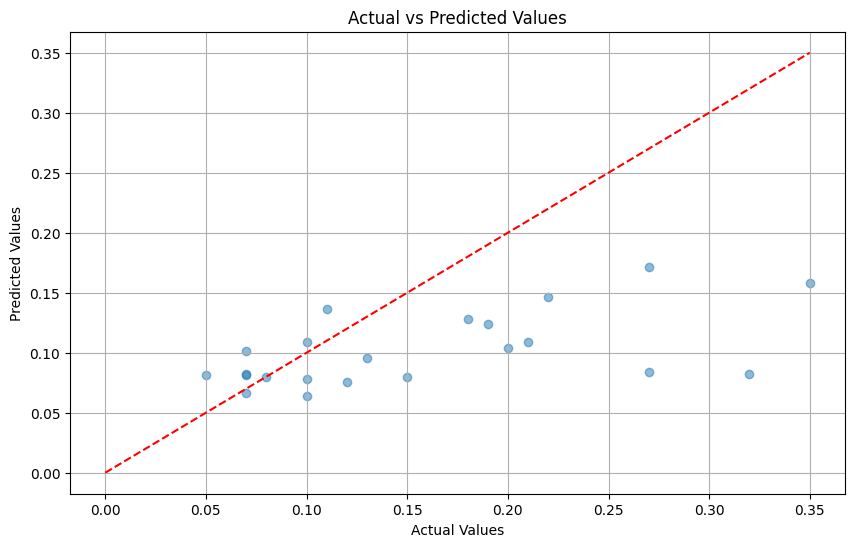

In [190]:
import matplotlib.pyplot as plt
import numpy as np

actual_values = y


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, 0.35], [0, 0.35], 'r--')  # A reference line for perfect predictions
plt.show()


## Calculate various types of error metrics

In [191]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
actual = image_dt["VCAR"]

# Calculate metrics
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)


print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 0.06523768916726111
Mean Squared Error: 0.008286219013276638
Root Mean Squared Error: 0.09102867138037685


# Extra Work (Extra Marks?)

## Use the below code to indivisually plot correlations

Just change the param variable.

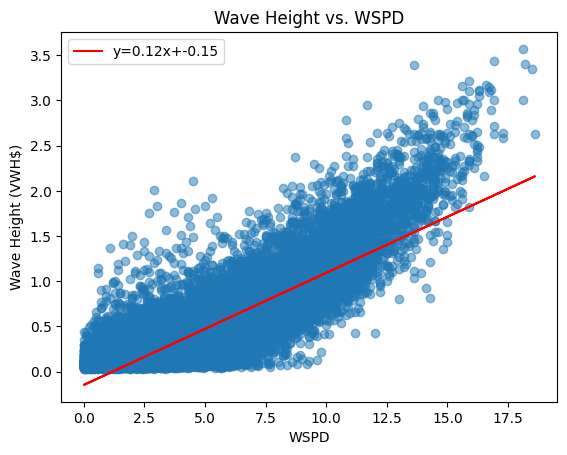

In [125]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example parameter: Wind Speed (WSPD)
param = "WSPD"
wave_height = "VCAR"

# Prepare data (drop NaN values to avoid errors in regression calculation)
plot_data = data[[wave_height, param]].dropna()

# Scatter plot
plt.scatter(plot_data[param], plot_data[wave_height], alpha=0.5)

# Fit a line
slope, intercept, r_value, p_value, std_err = linregress(
    plot_data[param], plot_data[wave_height]
)
plt.plot(
    plot_data[param],
    intercept + slope * plot_data[param],
    "r",
    label=f"y={slope:.2f}x+{intercept:.2f}",
)

plt.title(f"Wave Height vs. {param}")
plt.xlabel(param)
plt.ylabel("Wave Height (VCAR)")
plt.legend()
plt.show()

## Linear Wave Theory (My implementation doesn't work properly yet)

Algorithm Steps
1. Data Preparation

    Input: Series of radar images.
    Process:
        Convert polar coordinates (if necessary) to Cartesian for easier processing.
        Pre-filter images to correct for range and azimuth dependencies, applying a calibration function to each image.

2. Image Intensity Transformation

    Objective: Modify the radar image intensity to a “wave elevation”-like representation.
    Process:
        For each image, calculate the mean intensity of visible areas (non-shadowed).
        Subtract this mean from the image intensities to center data around zero, mimicking elevation around mean sea level.

3. Fourier Transform and Filtering

    Objective: Extract wave-related signals from radar images using 3D Fourier Transform (3D-FFT).
    Process:
        Apply 3D-FFT to the series of modified images.
        Use a high-pass filter to remove long-range dependent modulation effects.
        Apply a band-pass filter based on the linear dispersion relation to isolate wave-related frequency components.

4. Modulation Transfer Function (MTF)

    Objective: Minimize non-physical effects inherent in radar measurements.
    Process:
        Multiply the filtered spectrum by an MTF to adjust for shadowing and tilt modulations.

5. Inverse Fourier Transform

    Objective: Convert the spectrum back to spatial domain to get reconstructed wave elevation.
    Process:
        Apply inverse 3D-FFT to the modified spectrum.
        Scale the reconstructed elevation to real-world values using significant wave height information, if available.

### Image Intensity Transform

In [4]:
from Wamos2.polar_image import PolarImage
import glob
import numpy as np
input_path = r"Data\Polar Images\0428_1400"
import os

def find_pol_files(directory, ext="pol"):
    pattern = os.path.join(directory, f"**/*.{ext}")
    pol_files = glob.glob(pattern, recursive=True)
    return pol_files


def modify_radar_image(radar_image):
    """
    Modify the radar image intensity to center data around zero.

    Parameters:
    - radar_image: A 2D numpy array representing a single radar image.

    Returns:
    - modified_image: The modified radar image centered around zero mean.
    """
    # Calculate the mean intensity of visible (non-shadowed) areas
    visible_mask = radar_image > 0  # Assuming shadowed areas have intensity of 0
    mean_intensity = np.mean(radar_image[visible_mask])

    # Subtract the mean intensity from the image to center data around zero
    modified_image = radar_image - mean_intensity

    return modified_image

polar_files = find_pol_files(input_path)
polarImages = []

for image in polar_files:
    polarImage = PolarImage(image)
    polarImage.image_array = modify_radar_image(polarImage.image_array)
    polarImages.append(polarImage)



# Assuming 'raw_images_series' is your original data with integer datatype
# modified_images_series = np.array(polarImages, dtype=np.float64)

# Now, 'modified_images_series' is ready for processing and has float64 datatype

[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140000ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140002ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140003ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140004ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140005ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140007ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140008ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140009ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140011ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140012ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140013ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 2016042814

[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140048ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140050ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140051ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140052ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140053ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140055ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140056ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140057ocm
[INFO]  Created image array of size (1364, 356)
[INFO]  Processed 20160428140059ocm


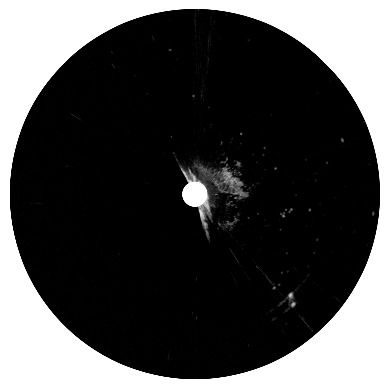

<Figure size 400x400 with 0 Axes>

In [5]:
polarImages[0].render()

### Calculate Delta X, Y (This is most likely wrong)

In [7]:
import numpy as np

R = 356  # Maximum range
num_rays = 1364  # Number of rays

# Convert angular resolution from degrees to radians
delta_theta_rad = (360 / num_rays) * (np.pi / 180)

# Calculate delta x and delta y
delta_x = delta_y = R * delta_theta_rad

print(f"Delta x: {delta_x:.4f}, Delta y: {delta_y:.4f}")

Delta x: 1.6399, Delta y: 1.6399


### 3D FTT and Filtering

In [19]:
import numpy as np
import scipy.fftpack as fftpack

delta_x, delta_y, delta_t = 1.6399, 1.6399, 1.5
def fourier_transform_and_filter(
    modified_images_series, delta_t, delta_x, delta_y, c=0.5, b=2
):
    """
    Apply 3D Fourier Transform and filtering on a series of modified radar images.

    Parameters:
    - modified_images_series: A 3D numpy array of modified radar images over time.
    - delta_t: Time interval between consecutive images.
    - delta_x, delta_y: Spatial resolution in x and y dimensions.
    - c: Cut-off parameter for high-pass filter.
    - b: Bandwidth parameter for band-pass filter.

    Returns:
    - filtered_wave_signals: The 3D array of filtered wave-related signals.
    """
    # Constants
    g = 9.81  # Acceleration due to gravity, m/s^2

    # 3D Fourier Transform
    fft_images = fftpack.fftn(modified_images_series)

    # Frequency bins
    freq_t = fftpack.fftfreq(modified_images_series.shape[0], d=delta_t)
    freq_x = fftpack.fftfreq(modified_images_series.shape[1], d=delta_x)
    freq_y = fftpack.fftfreq(modified_images_series.shape[2], d=delta_y)

    # Meshgrid of frequencies
    FREQ_T, FREQ_X, FREQ_Y = np.meshgrid(freq_t, freq_x, freq_y, indexing="ij")

    # Wavenumber and frequency magnitudes
    wavenumber_magnitude = np.sqrt(FREQ_X**2 + FREQ_Y**2)
    frequency_magnitude = np.abs(FREQ_T)

    # Dispersion relation for deep water waves
    theoretical_frequency = np.sqrt(g * wavenumber_magnitude)

    # High-pass filter (remove low-frequency noise)
    high_pass_mask = frequency_magnitude > (
        c * np.min(theoretical_frequency[theoretical_frequency > 0])
    )

    # Band-pass filter (isolate wave-related signals)
    band_pass_mask = np.logical_and(
        frequency_magnitude >= (theoretical_frequency - b),
        frequency_magnitude <= (theoretical_frequency + b),
    )

    # Apply filters
    filtered_fft_images = np.zeros_like(fft_images)
    filter_mask = np.logical_and(high_pass_mask, band_pass_mask)
    filtered_fft_images[filter_mask] = fft_images[filter_mask]

    # Inverse Fourier Transform to spatial domain
    filtered_wave_signals = fftpack.ifftn(filtered_fft_images).real

    return filtered_wave_signals


# Example usage
# Assuming 'modified_images_series' is your 3D array of modified radar images,
# and you have defined 'delta_t', 'delta_x', 'delta_y'
filtered_wave_signals = fourier_transform_and_filter(
    modified_images_series, delta_t, delta_x, delta_y
)


### MFT

In [20]:
import numpy as np
import scipy.fftpack as fftpack


def apply_mtf(filtered_wave_signals, delta_x, delta_y, mtf_parameter=0.5):
    """
    Apply the Modulation Transfer Function (MTF) to the filtered wave signals.

    Parameters:
    - filtered_wave_signals: The 3D array of filtered wave-related signals.
    - delta_x, delta_y: Spatial resolution in x and y dimensions.
    - mtf_parameter: An empirical parameter for the MTF. Default is set to 0.5.

    Returns:
    - mtf_applied_signals: The 3D array of signals after MTF has been applied.
    """
    # Get the size of the input signal array
    n_time_steps, n_x_pixels, n_y_pixels = filtered_wave_signals.shape

    # 3D Fourier Transform of the filtered signals
    fft_filtered_signals = fftpack.fftn(filtered_wave_signals)

    # Frequency bins for spatial dimensions
    freq_x = fftpack.fftfreq(n_x_pixels, d=delta_x)
    freq_y = fftpack.fftfreq(n_y_pixels, d=delta_y)

    # Meshgrid of spatial frequencies
    FREQ_X, FREQ_Y = np.meshgrid(freq_x, freq_y, indexing="ij")

    # Calculate the magnitude of the spatial frequency vector
    spatial_freq_magnitude = np.sqrt(FREQ_X**2 + FREQ_Y**2)

    # Apply the Modulation Transfer Function (MTF)
    # This example uses a simple form: MTF = |k|^(-mtf_parameter)
    # where k is the spatial frequency magnitude, and mtf_parameter is an empirical parameter
    mtf = np.power(spatial_freq_magnitude, -mtf_parameter)
    mtf[0, 0] = 1  # To avoid division by zero at the DC component

    # Apply MTF to each time step
    for t in range(n_time_steps):
        fft_filtered_signals[t, :, :] *= mtf

    # Inverse Fourier Transform to get back to spatial domain
    mtf_applied_signals = fftpack.ifftn(fft_filtered_signals).real

    return mtf_applied_signals



# Example usage
# Assuming 'filtered_wave_signals' is the result from previous filtering steps,
# and 'delta_x', 'delta_y' are known spatial resolutions.
mtf_applied_signals = apply_mtf(filtered_wave_signals, 1.63, 1.63, mtf_parameter=0.5)

C:\Users\xtrm2\AppData\Local\Temp\ipykernel_23492\1626243408.py:36: RuntimeWarning: divide by zero encountered in power
  mtf = np.power(spatial_freq_magnitude, -mtf_parameter)


### IFT

In [21]:
import numpy as np
import scipy.fftpack as fftpack


def inverse_fourier_transform(mtf_applied_signals):
    """
    Apply the Inverse Fourier Transform to the signals after MTF application.

    Parameters:
    - mtf_applied_signals: The 3D array of signals after MTF has been applied in the frequency domain.

    Returns:
    - reconstructed_wave_field: The 3D array of signals transformed back to the spatial domain.
    """
    # Perform Inverse Fourier Transform on the modified signals
    reconstructed_wave_field = fftpack.ifftn(mtf_applied_signals).real

    return reconstructed_wave_field


# Example usage
# Assuming 'mtf_applied_signals' is the result from applying MTF to your frequency-domain signals,
reconstructed_wave_field = inverse_fourier_transform(mtf_applied_signals)

### Reconstructed Waveform

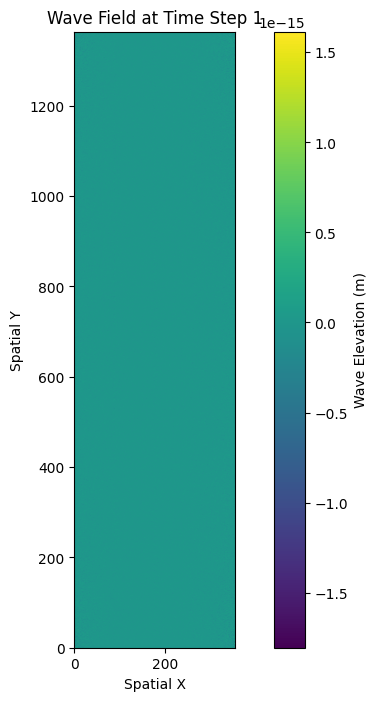

In [29]:
import matplotlib.pyplot as plt


def plot_wave_field_at_time(reconstructed_wave_field, time_step):
    """
    Plot the wave field at a specific time step.

    Parameters:
    - reconstructed_wave_field: The 3D array of the reconstructed wave field.
    - time_step: The specific time step at which to visualize the wave field.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(
        reconstructed_wave_field[time_step, :, :],
        extent=[
            0,
            reconstructed_wave_field.shape[2],
            0,
            reconstructed_wave_field.shape[1],
        ],
        origin="lower",
    )
    plt.colorbar(label="Wave Elevation (m)")
    plt.xlabel("Spatial X")
    plt.ylabel("Spatial Y")
    plt.title(f"Wave Field at Time Step {time_step}")
    plt.show()


# Example usage: assuming you have a reconstructed_wave_field and want to visualize the wave field at time step 5
plot_wave_field_at_time(reconstructed_wave_field, 1)

### Animation

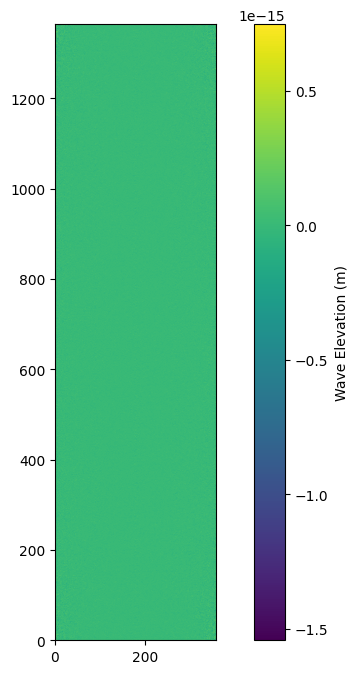

d:\Workspace\Wave-Height-Analysis\.venv\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [30]:
from matplotlib.animation import FuncAnimation


def animate_wave_field(reconstructed_wave_field):
    """
    Create an animation of the wave field over time.

    Parameters:
    - reconstructed_wave_field: The 3D array of the reconstructed wave field.
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    def update(time_step):
        ax.clear()
        contour = ax.imshow(
            reconstructed_wave_field[time_step, :, :],
            extent=[
                0,
                reconstructed_wave_field.shape[2],
                0,
                reconstructed_wave_field.shape[1],
            ],
            origin="lower",
        )
        ax.set_title(f"Time Step: {time_step}")
        return (contour,)

    anim = FuncAnimation(
        fig, update, frames=reconstructed_wave_field.shape[0], interval=50
    )
    plt.colorbar(
        ax.imshow(
            reconstructed_wave_field[0, :, :],
            extent=[
                0,
                reconstructed_wave_field.shape[2],
                0,
                reconstructed_wave_field.shape[1],
            ],
            origin="lower",
        ),
        ax=ax,
        label="Wave Elevation (m)",
    )
    plt.show()


# Example usage
animate_wave_field(reconstructed_wave_field)